##  Jupyter Notebook for plotting DAS data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from scipy import signal

import sys
import os

import h5py
import h5pyd

### Define relevant variables 

In [2]:

EVENT_NAME = 'HAMMER'
target_file_H = '/Users/nicola/Desktop/APP_GEO__HAMMER_section_0.h5' 

DAS_samples_per_second=500


### Read H5 file

In [3]:
data_stream = []

path = target_file_H

with h5py.File(path, "r") as f:
    # List all groups
    print("Keys: %s" % f.keys())
    a_group_key = list(f.keys())[0]

    # Get the data
    data = list(f[a_group_key])
            


Keys: <KeysViewHDF5 ['fa1-21060065']>


In [4]:
data_stream = []

path = target_file_H

with h5py.File(path, 'r') as f:
    print(list(f['fa1-21060065/Source1']))
    print(list(f['fa1-21060065/Source1/Zone1']))
    das = np.array(f['fa1-21060065/Source1/Zone1/StrainRate'])
    time_das = np.array(f['fa1-21060065/Source1/time'])
    print(das.shape)
    print(das.shape)
    npts=das.shape[0]
    nch=das.shape[1]
    print('START EPOCH:', time_das[0])
    print('END EPOCH:', time_das[time_das.shape[0]-1])
    


['Zone1', 'time']
['StrainRate']
(468785, 376)
(468785, 376)
START EPOCH: 1651068911.2890484
END EPOCH: 1651069849.2801535


In [5]:
istat = 0
while istat < nch: 
    if istat % 100 == 0:
        print('Append channel: ', istat)
    trace = []
    isps = 0
    while isps < npts:
        trace.append(das[isps,istat])
        isps=isps+1
    data_stream.append(trace)
    istat=istat+1
    

    

Append channel:  0
Append channel:  100
Append channel:  200
Append channel:  300


### Apply a filter

In [6]:

# FILTRO "TIENI TUTTO"
MIN_FREQ=0.01
MAX_FREQ=0.99
#

bandpass_filter = signal.butter(2,Wn=[MIN_FREQ,MAX_FREQ],btype='band',output='sos')
filt_data = signal.sosfilt(bandpass_filter,data_stream)




### PLOT same data FILTER/NO-FILTER

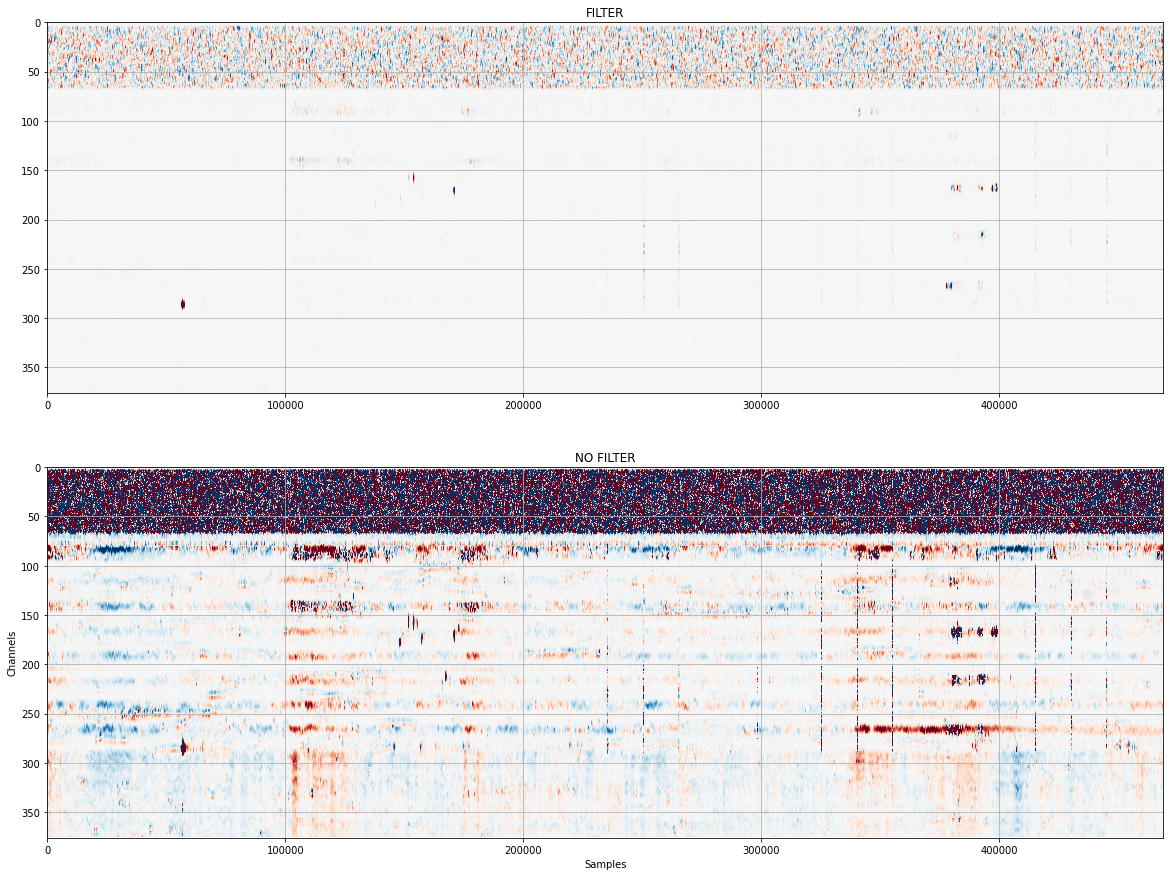

In [8]:


xmin=0; xmax=468785

fig = plt.figure(figsize=(20, 15))
gs = gridspec.GridSpec(nrows=2, ncols=1, hspace=0.2, height_ratios=[1, 1])

ax1 = fig.add_subplot(gs[0, 0])
ax1.imshow(filt_data, cmap="RdBu", vmin=-500, vmax=500, aspect='auto')
ax1.set_title('FILTER')
ax1.set_xlim(xmin,xmax)
ax1.set_ylim(nch,0)
ax1.grid()

ax2 = fig.add_subplot(gs[1, 0])
ax2.imshow(data_stream, cmap="RdBu", vmin=-500, vmax=500, aspect='auto')
ax2.set_title('NO FILTER')
ax2.set_xlim(xmin,xmax)
ax2.set_ylim(nch,0)
ax2.grid()
ax2.set_ylabel('Channels')
ax2.set_xlabel('Samples')

outputFigure='/Users/nicola/Desktop/' + EVENT_NAME + '001.png'
plt.savefig(outputFigure)
plt.show()




### Plot Stack

In [ ]:
data = filt_data.T

t = []
s1 = []
dec_s1 = []
isub_seg = 0

#
# Segment definitions
N_sub_seg = 10
start_ch = 100
end_ch = 200
N_ch_per_stack=10
while isub_seg < N_sub_seg:
    
    #
    # Sommare i canali selezionati
    #

    j0 = start_ch + (isub_seg*N_ch_per_stack)
    j_end = start_ch + ((isub_seg+1)*N_ch_per_stack)
    j_lab=str(j0)
    print('Segment:', isub_seg)
    print('Starting channel:', j0)
    ntr = 1
    s1 = data[:,j0]
    j1 = j0 + 1
    while j1 < j_end:
        ntr += 1
        print('Adding channel:', j1)
        s0 = data[:,j1]
        s = np.add(s1,s0)  
        s1 = np.copy(s)
        j1 += 1

    print('Number of channels in stack:',ntr)
    s1 = (1/ntr) * s1   

    #
    # plot the stack
    #
    
    t1=np.arange(0,(1/DAS_samples_per_second)*npts,1/DAS_samples_per_second) 
    plt.figure(figsize=(20, 3))
    plt.xlim(0,1000)
    plt.grid()
    plt.plot(t1,s1,'g-', label=j_lab)
    # Create legend.
    plt.legend(loc='upper left')
    plt.ylabel('Amplitude')
    plt.xlabel('Time (s)')
    sub_plot_label=str(isub_seg)
    outputFigure='/Users/nicola/Desktop/' + EVENT_NAME + '_004_' + sub_plot_label + '.png'
    plt.savefig(outputFigure)
    plt.show()
    

    
    isub_seg += 1


### Plot Stack from section 2

In [ ]:
data = filt_data.T

t = []
s1 = []
dec_s1 = []
isub_seg = 0

#
# Segment definitions
N_sub_seg = 2
start_ch = 2290
end_ch = 2310
while isub_seg < N_sub_seg:
    
    #
    # Sommare i canali selezionati
    #

    j0 = start_ch + (isub_seg*10)
    j_end = start_ch + ((isub_seg+1)*10)
    j_lab=str(j0)
    print('Segment:', isub_seg)
    print('Starting channel:', j0)
    print('Ending channel:', j_end)
    ntr = 1
    s1 = data[:,j0]
    j1 = j0 + 1
    while j1 < j_end:
        ntr += 1
        #print('Adding channel:', j1)
        s0 = data[:,j1]
        s = np.add(s1,s0)  
        s1 = np.copy(s)
        j1 += 1

    print('Number of channels in stack:',ntr)
    s1 = (1/ntr) * s1   

    #
    # plot the stack
    #
    
    t1=np.arange(0,(1/250)*1648,1/250) 
    plt.figure(figsize=(20, 3))
    plt.xlim(0,6)
    plt.grid()
    plt.plot(t1,s1,'g-', label=j_lab)
    # Create legend.
    plt.legend(loc='upper left')
    plt.ylabel('Amplitude')
    plt.xlabel('Time (s)')
    sub_plot_label=str(isub_seg)
    outputFigure='/Users/nicola/Desktop/' + EVENT_NAME + '005_' + sub_plot_label + '.png'
    plt.savefig(outputFigure)
    plt.show()
    

    
    isub_seg += 1


### Plot Stack from section 4

In [ ]:
data = filt_data.T

t = []
s1 = []
dec_s1 = []
isub_seg = 0

#
# Segment definitions
N_sub_seg = 15
start_ch = 3550
end_ch = 3700
while isub_seg < N_sub_seg:
    
    #
    # Sommare i canali selezionati
    #

    j0 = start_ch + (isub_seg*10)
    j_end = start_ch + ((isub_seg+1)*10)
    j_lab=str(j0)
    print('Segment:', isub_seg)
    print('Starting channel:', j0)
    print('Ending channel:', j_end)
    ntr = 1
    s1 = data[:,j0]
    j1 = j0 + 1
    while j1 < j_end:
        ntr += 1
        #print('Adding channel:', j1)
        s0 = data[:,j1]
        s = np.add(s1,s0)  
        s1 = np.copy(s)
        j1 += 1

    print('Number of channels in stack:',ntr)
    s1 = (1/ntr) * s1   

    #
    # plot the stack
    #
    
    t1=np.arange(0,(1/250)*1648,1/250) 
    plt.figure(figsize=(20, 3))
    plt.xlim(0,6)
    plt.grid()
    plt.plot(t1,s1,'g-', label=j_lab)
    # Create legend.
    plt.legend(loc='upper left')
    plt.ylabel('Amplitude')
    plt.xlabel('Time (s)')
    sub_plot_label=str(isub_seg)
    outputFigure='/Users/nicola/Desktop/' + EVENT_NAME + '_006_' + sub_plot_label + '.png'
    plt.savefig(outputFigure)
    plt.show()
    

    
    isub_seg += 1


### How to get EPOCH time from file name:

In [ ]:

date -j -f "%a %b %d %T %Z %Y" "Mon Mar 16 13:11:47 CET 2022" "+%s"
